In [32]:
#21/6/24 Random Forest Model Creation for Basak Descriptors of Mutagen Dataset

import pandas as pd
import numpy as np
import math
import os
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#Data import
seed = 81

datasets = []
index = []
directory = '/Users/james/Documents/Honours/Data/structdata/Mutagen/chemopy/'
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if 'csv' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        datasets.append(df)
        index.append(file)

In [33]:
loops = 0
for df in datasets:
    print(df.isnull().values.any())
    print(index[loops])
    loops = loops + 1

False
mut_kappa.csv
False
mut_basak.csv
False
mut_connectivity.csv
False
mut_constitution.csv
False
mut_moe.csv
False
mut_estate.csv
False
mut_molprop.csv


In [34]:
datasets[5]

,SMILES,Toxicity_Values,Shev,Scar,Shal,Shet,Save,Smax,Smin,DS
0,OC[C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO,0,44.333333,-24.448769,0.000000,68.782102,3.694444,8.956620,-1.669306,10.625926
1,OCC(O)CO,0,22.333333,-9.831250,0.000000,32.164583,3.722222,8.166667,-0.953704,9.120370
2,O=[N+]([O-])OCC(CO[N+](=O)[O-])O[N+](=O)[O-],1,62.833333,-12.476389,0.000000,75.309722,4.188889,9.831582,-1.545556,11.377137
3,FC(F)(F)C(Cl)Br,0,33.444444,-7.741512,39.962191,41.185957,4.777778,10.999421,-4.317901,15.317323
4,FC(F)OC(Cl)C(F)(F)F,0,51.527778,-14.628665,61.700856,66.156443,5.152778,11.219213,-4.946443,16.165656
...,...,...,...,...,...,...,...,...,...,...
7480,c1cc2c3c(cccc3c1)[C@H]1N[C@@H]21,1,23.833333,-6.641450,0.000000,30.474784,1.833333,3.484213,0.626019,2.858194
7481,c1cc2sncc2cc1OC[C@H]1CO1,1,29.166667,-10.575581,0.000000,39.742248,2.083333,5.559259,0.311386,5.247873
7482,c1ccc2c(c1)ccc1cc3ccc4ccccc4c3cc12,1,41.333333,-10.693812,0.000000,52.027146,1.878788,2.356481,1.300543,1.055938
7483,c1ccc2c3c4c(cc5ccccc5c4cc2c1)[C@@H]1O[C@H]31,1,39.500000,-10.501659,0.000000,50.001659,1.880952,5.926524,0.282789,5.643735


In [35]:
#function to calculate various metrics, outputs a list of various metrics with a consistent index
def metriccalc(preds, ytrain):
    correctcount = 0
    fpcount = 0
    tpcount = 0
    tncount = 0
    fncount = 0
    testpos = 0
    testneg = 0
    
    #loop through each item in the predictions, logging positives, negatives and tn/tp/fn/tp
    iterations = 0
    for value in preds:
        testscore = ytrain[iterations]
        if value == 1:
            if testscore != 0:
                testpos = testpos + 1
                correctcount = correctcount + 1
                tpcount = tpcount + 1
            else:
                fpcount = fpcount + 1
                testneg = testneg + 1
        else:
            if testscore != 0:
                testpos = testpos + 1
                fncount = fncount + 1
            else:
                testneg = testneg + 1
                correctcount = correctcount + 1
                tncount = tncount + 1

        iterations = iterations + 1
    
    #calculate a wide swathe of metrics
    netfn = fncount / (fncount + tncount)
    nettn = tncount / (fncount + tncount)
    netacc = correctcount / (fpcount + fncount + tpcount + tncount)
    posacc = tpcount / testpos
    negacc = tncount / testneg
    netfp = fpcount / (fpcount + tpcount)
    nettp = tpcount / (tpcount + fpcount)

    fpr = fpcount / (fpcount + tncount)
    tpr = tpcount / (tpcount + fncount)



    f1 = (2 * tpcount) / ((2 * tpcount) + fpcount + fncount)


    tp = tpcount
    fp = fpcount
    tn = tncount
    fn = fncount

    
    temp = math.sqrt((fp + tn) * (tp + fp) * (tp + fn) * (tn + fn))
    if temp == 0:
        return [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    mcc = ((tp * tn) - (fp * fn)) / temp



    temp = (( ( (tp + fp) * (fp + tn) ) + ( (tp + fn) * (fn + tn) ) ))
    if temp == 0:
        return 0
    kapp =  ( 2 * ((tp * tn) - (fn * fp)) ) / temp
    
    metriclist = [testpos, testneg, fn, tn, tp, fp, netacc, posacc, negacc, fpr, tpr, f1, mcc, kapp]
    
    return metriclist

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


best mcc of 0.4111066101163114 with an mtry of 24


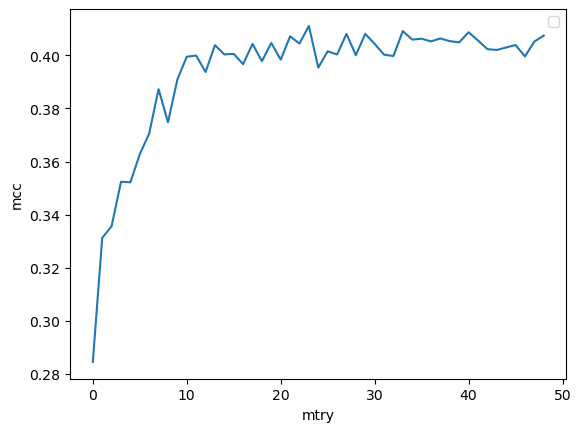

for dataset mut_kappa.csv validation metrics of:
positives in data 2121
negatives in data 1622 

fn count = 570
tn count = 1105
tp count = 1551
fp count = 517 

net accuracy = 0.7095912369756879
positive accuracy = 0.7312588401697313
negative accuracy = 0.6812577065351418 

fpr = 0.3187422934648582
tpr = 0.7312588401697313 

f1 score = 0.7405108617808546
mcc = 0.4111066101163114
cohen Kappa = 0.41093700842236053


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


best mcc of 0.4088029963392148 with an mtry of 38


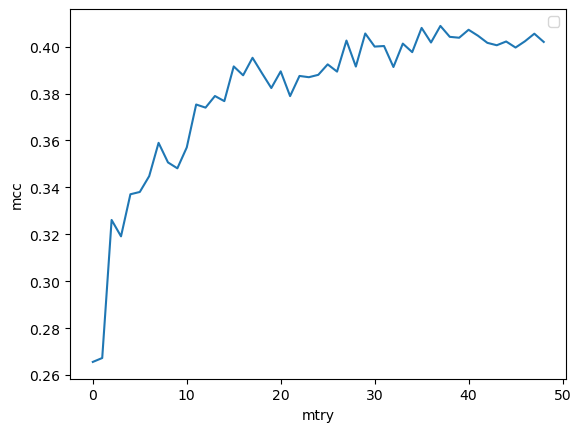

for dataset mut_basak.csv validation metrics of:
positives in data 2121
negatives in data 1622 

fn count = 490
tn count = 1032
tp count = 1631
fp count = 590 

net accuracy = 0.7114613946032594
positive accuracy = 0.768976897689769
negative accuracy = 0.6362515413070283 

fpr = 0.3637484586929716
tpr = 0.768976897689769 

f1 score = 0.7512666973744818
mcc = 0.4088029963392148
cohen Kappa = 0.4081887686981453


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


best mcc of 0.49205228258315736 with an mtry of 41


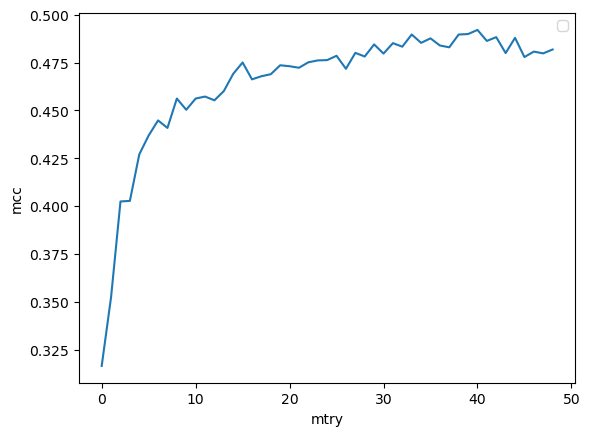

for dataset mut_connectivity.csv validation metrics of:
positives in data 2121
negatives in data 1622 

fn count = 461
tn count = 1150
tp count = 1660
fp count = 472 

net accuracy = 0.7507347047822602
positive accuracy = 0.7826496935407826
negative accuracy = 0.7090012330456227 

fpr = 0.2909987669543773
tpr = 0.7826496935407826 

f1 score = 0.7806254408652715
mcc = 0.49205228258315736
cohen Kappa = 0.49204345868784666


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


best mcc of 0.5393872614720832 with an mtry of 32


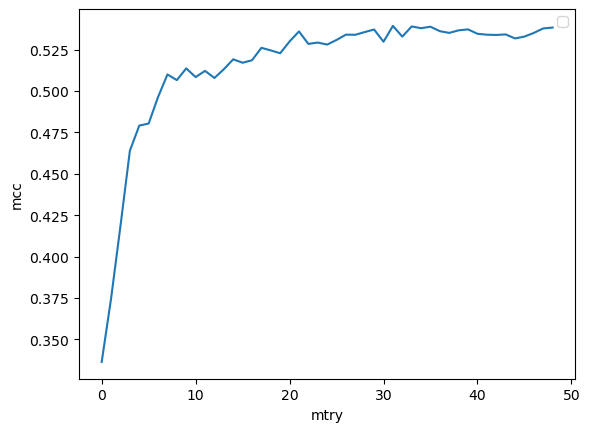

for dataset mut_constitution.csv validation metrics of:
positives in data 2121
negatives in data 1622 

fn count = 417
tn count = 1193
tp count = 1704
fp count = 429 

net accuracy = 0.7739780924392199
positive accuracy = 0.8033946251768034
negative accuracy = 0.7355117139334155 

fpr = 0.2644882860665845
tpr = 0.8033946251768034 

f1 score = 0.8011283497884344
mcc = 0.5393872614720832
cohen Kappa = 0.5393757484141475


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


best mcc of 0.6047175874389351 with an mtry of 48


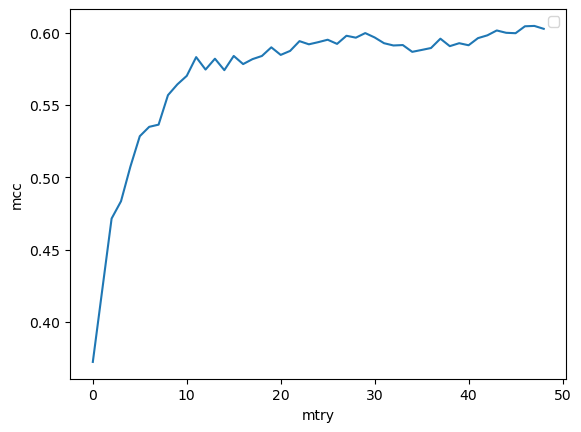

for dataset mut_moe.csv validation metrics of:
positives in data 2121
negatives in data 1622 

fn count = 367
tn count = 1262
tp count = 1754
fp count = 360 

net accuracy = 0.8057707721079348
positive accuracy = 0.826968411126827
negative accuracy = 0.7780517879161529 

fpr = 0.2219482120838471
tpr = 0.826968411126827 

f1 score = 0.8283353010625738
mcc = 0.6047175874389351
cohen Kappa = 0.6047132074194471


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


best mcc of 0.4487647765105364 with an mtry of 47


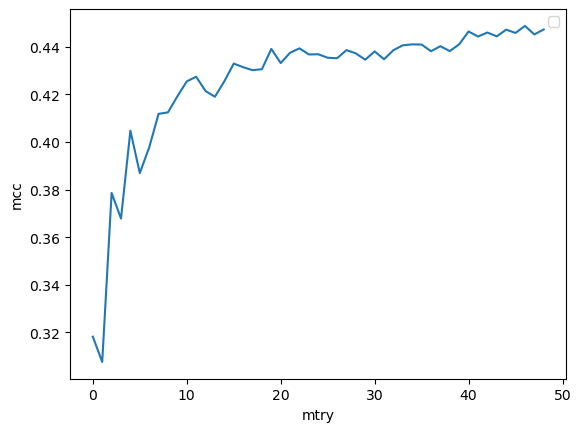

for dataset mut_estate.csv validation metrics of:
positives in data 2121
negatives in data 1622 

fn count = 440
tn count = 1056
tp count = 1681
fp count = 566 

net accuracy = 0.7312316323804435
positive accuracy = 0.7925506836397925
negative accuracy = 0.6510480887792849 

fpr = 0.34895191122071517
tpr = 0.7925506836397925 

f1 score = 0.7696886446886447
mcc = 0.4487647765105364
cohen Kappa = 0.4476897464668911


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


best mcc of 0.4655209046667993 with an mtry of 47


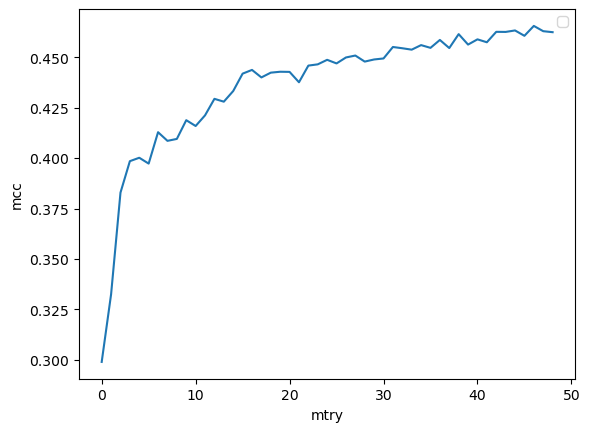

for dataset mut_molprop.csv validation metrics of:
positives in data 2121
negatives in data 1622 

fn count = 417
tn count = 1064
tp count = 1704
fp count = 558 

net accuracy = 0.7395137590168315
positive accuracy = 0.8033946251768034
negative accuracy = 0.655980271270037 

fpr = 0.344019728729963
tpr = 0.8033946251768034 

f1 score = 0.7775496235455168
mcc = 0.4655209046667993
cohen Kappa = 0.4641209133699404


In [36]:
loops = 0
for targetdata in datasets:
    trainset, testset = train_test_split(targetdata, test_size=0.5, random_state=seed)
    xtrain = trainset.iloc[:, 2:]
    ytrain = trainset.iloc[:, 1].values
    xtest = testset.iloc[:, 2:]
    ytest = testset.iloc[:, 1].values


    mcclist = []
    maxval = 0
    for mtry in range(1, 50):
        #using mtry as the adjusted hyperparameter creates a series of random forests
        rf = RandomForestClassifier(n_estimators=mtry, criterion='entropy', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                bootstrap=True, oob_score=False, n_jobs= 4, random_state=seed, 
                                verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

        model= rf.fit(xtrain, ytrain)
        preds = model.predict(xtest)
        #calculate metric (mcc)
        mcc = metriccalc(preds, ytest)[12]
        mcclist.append(mcc)
        if mcc > maxval:
            maxval = mcc
            bestmetrics = mtry
    #store best model for the given fold and plot the metric vs mcc value
    rf = RandomForestClassifier(n_estimators=bestmetrics, criterion='entropy', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                bootstrap=True, oob_score=False, n_jobs= 4, random_state=seed, 
                                verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
    print('best mcc of', maxval, 'with an mtry of', bestmetrics)
    plt.plot(mcclist)

    plt.xlabel('mtry')
    plt.ylabel('mcc')
    plt.legend()
    plt.show()

    model= rf.fit(xtrain, ytrain)
    preds = model.predict(xtest)
    results = metriccalc(preds, ytest)
    print('for dataset', index[loops], 'validation metrics of:')
    print('positives in data', results[0])
    print('negatives in data', results[1], '\n')
    print('fn count =', results[2])
    print('tn count =', results[3])
    print('tp count =', results[4])
    print('fp count =', results[5], '\n')
    print('net accuracy =', results[6])
    print('positive accuracy =', results[7])
    print('negative accuracy =', results[8], '\n')
    print('fpr =', results[9])
    print('tpr =', results[10], '\n')
    print('f1 score =',results[11])
    print('mcc =',results[12])
    print('cohen Kappa =',results[13])
    loops = loops + 1